# MLB Pitching Data Exploration

In [1]:
# Import libraries
import pybaseball
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Import specific functions from Pybaseball
from pybaseball import pitching_stats
from pybaseball import pitching_stats_bref
from pybaseball import pitching_stats_range

In [3]:
# More packages
from pybaseball import statcast
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

## Getting to know the data

As someone who's completely new to sabermetrics and professional baseball data in general I have to familiarize myself with pitching data entails. In this next section I'll dive deep into pitching data from a single arbitrarily chosen season and get a clearer picture of the data I will be working with. This process will also help me in feature selection and engineering for the modeling I'll be doing later on.

### Exploring pitch-by-pitch data through Shohei Ohtani's 2022 season

In [4]:
# Load Ohtani's pitching data from 2022 season
shohei_ohtani = data = statcast_pitcher('2022-02-01', '2022-11-15', player_id = 660271)

Gathering Player Data


In [5]:
# Convert game_date to datetime
shohei_ohtani['game_date'] = pd.to_datetime(shohei_ohtani['game_date'])

In [6]:
# Sort the data by game_date in ascending order
shohei_ohtani.sort_values(by = 'game_date', inplace = True)

In [7]:
shohei_ohtani

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
2683,NaN,2022-03-21,NaN,NaN,NaN,"Ohtani, Shohei",664728,660271,NaN,called_strike,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2662,NaN,2022-03-21,NaN,NaN,NaN,"Ohtani, Shohei",658668,660271,single,hit_into_play,...,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2663,NaN,2022-03-21,NaN,NaN,NaN,"Ohtani, Shohei",664728,660271,triple,hit_into_play,...,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2664,NaN,2022-03-21,NaN,NaN,NaN,"Ohtani, Shohei",672580,660271,strikeout,swinging_strike,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2665,NaN,2022-03-21,NaN,NaN,NaN,"Ohtani, Shohei",672580,660271,NaN,swinging_strike,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,ST,2022-10-05,84.7,-2.59,5.73,"Ohtani, Shohei",640461,660271,NaN,swinging_strike,...,1,0,6.0,1.0,NaN,NaN,2.74,-1.12,-1.12,35.0
48,ST,2022-10-05,84.7,-2.51,5.76,"Ohtani, Shohei",640461,660271,NaN,ball,...,1,0,6.0,1.0,NaN,NaN,2.85,-1.05,-1.05,35.8
49,FF,2022-10-05,98.0,-2.10,5.90,"Ohtani, Shohei",519390,660271,field_out,hit_into_play,...,1,0,6.0,1.0,NaN,NaN,1.25,0.63,-0.63,38.0
43,ST,2022-10-05,86.5,-2.59,5.60,"Ohtani, Shohei",640461,660271,strikeout,swinging_strike,...,1,0,6.0,1.0,NaN,NaN,2.50,-1.15,-1.15,33.8


In [8]:
# Check for missing values in pitch_type
shohei_ohtani['pitch_type'].isnull().sum()

55

Pitch type will be my target variable in the prediction model I'm creating. Having missing data in this column is not ideal but of course this is only one pitcher out of the dozens that pitch every season.

#### Slice Shohei's stats into chunks

Splitting the columns up just so that I can view all of them.

In [9]:
first100 = shohei_ohtani.iloc[:, :100]

In [10]:
first100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2684 entries, 2683 to 0
Data columns (total 100 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   pitch_type                       2629 non-null   object        
 1   game_date                        2684 non-null   datetime64[ns]
 2   release_speed                    2629 non-null   float64       
 3   release_pos_x                    2629 non-null   float64       
 4   release_pos_z                    2629 non-null   float64       
 5   player_name                      2684 non-null   object        
 6   batter                           2684 non-null   int64         
 7   pitcher                          2684 non-null   int64         
 8   events                           688 non-null    object        
 9   description                      2684 non-null   object        
 10  spin_dir                         0 non-null      float64       


In [11]:
rest = shohei_ohtani.iloc[:, 100:]

In [12]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2684 entries, 2683 to 0
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age_bat_legacy                    2684 non-null   int64  
 1   age_pit                           2684 non-null   int64  
 2   age_bat                           2684 non-null   int64  
 3   n_thruorder_pitcher               2684 non-null   int64  
 4   n_priorpa_thisgame_player_at_bat  2684 non-null   int64  
 5   pitcher_days_since_prev_game      2549 non-null   float64
 6   batter_days_since_prev_game       2542 non-null   float64
 7   pitcher_days_until_next_game      2560 non-null   float64
 8   batter_days_until_next_game       2560 non-null   float64
 9   api_break_z_with_gravity          2629 non-null   float64
 10  api_break_x_arm                   2629 non-null   float64
 11  api_break_x_batter_in             2629 non-null   float64
 12  arm_angle  

In [13]:
# Seeing Ohtani's pitch types
shohei_ohtani['pitch_type'].value_counts()

pitch_type
ST    983
FF    718
FS    312
FC    233
CU    222
SI     97
SL     63
CS      1
Name: count, dtype: int64

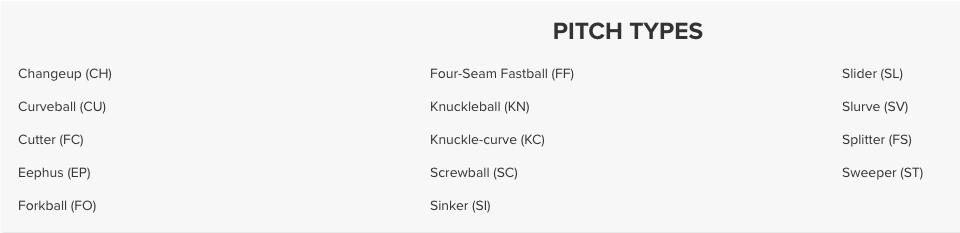

#### Aaron Nola 2022 stats

In [14]:
aaron_nola = statcast_pitcher('2022-02-01', '2022-11-15', player_id = 605400)

Gathering Player Data


In [15]:
aaron_nola['pitch_type'].value_counts()

pitch_type
FF    1224
KC     989
SI     662
CH     551
FC     244
Name: count, dtype: int64

In [16]:
aaron_nola.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
0,KC,2022-11-02,80.8,-1.96,5.31,"Nola, Aaron",665161,605400,single,hit_into_play,...,3,2,5.0,1.0,NaN,1.0,4.67,-1.11,-1.11,23.5
1,CH,2022-11-02,86.6,-2.05,5.09,"Nola, Aaron",665161,605400,NaN,ball,...,3,2,5.0,1.0,NaN,1.0,3.23,1.40,1.40,20.4
2,KC,2022-11-02,80.8,-1.86,5.34,"Nola, Aaron",665161,605400,NaN,ball,...,3,2,5.0,1.0,NaN,1.0,4.70,-1.14,-1.14,25.3
3,KC,2022-11-02,80.3,-1.87,5.40,"Nola, Aaron",665161,605400,NaN,foul_bunt,...,3,2,5.0,1.0,NaN,1.0,4.66,-1.24,-1.24,25.7
4,KC,2022-11-02,79.9,-1.93,5.40,"Nola, Aaron",665161,605400,NaN,swinging_strike,...,3,2,5.0,1.0,NaN,1.0,4.72,-1.27,-1.27,26.5


### Pitch-by-pitch data for all pitchers over a whole season

There are almost 780,000 pitches each full season so retrieving full datasets for a season will take a long time. In the cells below retrieving a full season's pitching data takes around a whole minute per season. The date range I've chosen as a way to cover full seasons. This means that pre-season games are also included. Pre-season games include Spring Training games which are denoted by S in the 'game_type' column. These will likely be excluded from the model.

In [17]:
# Suppressing warnings because the data retrieval processes below produce a lot of them
import warnings
warnings.filterwarnings("ignore")

In [18]:
# 2022 season
pitch_by_pitch_2022 = statcast('2022-02-01', '2022-11-15')
pitch_by_pitch_2022.info()

This is a large query, it may take a moment to complete
Skipping offseason dates


100%|██████████| 246/246 [01:55<00:00,  2.14it/s]


<class 'pandas.core.frame.DataFrame'>
Index: 773618 entries, 192 to 586
Columns: 113 entries, pitch_type to arm_angle
dtypes: Float64(35), Int64(61), datetime64[ns](1), object(16)
memory usage: 743.7+ MB


In [19]:
pitch_by_pitch_2022.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
192,SL,2022-11-05,89.2,-0.06,6.14,"Pressly, Ryan",592206,519151,field_out,hit_into_play,...,1,3,2,2,<NA>,<NA>,2.47,-0.41,-0.41,<NA>
200,FF,2022-11-05,93.9,-0.18,5.94,"Pressly, Ryan",547180,519151,field_out,hit_into_play,...,1,3,2,2,<NA>,<NA>,1.03,0.33,-0.33,<NA>
205,FF,2022-11-05,93.0,-0.09,5.97,"Pressly, Ryan",592663,519151,single,hit_into_play,...,1,3,2,2,<NA>,<NA>,1.02,0.2,0.2,<NA>
218,SL,2022-11-05,88.1,-0.15,6.03,"Pressly, Ryan",656555,519151,field_out,hit_into_play,...,1,3,2,2,<NA>,<NA>,2.7,-0.61,-0.61,<NA>
227,SL,2022-11-05,89.0,-0.25,6.06,"Pressly, Ryan",656555,519151,NaN,foul,...,1,3,2,2,<NA>,<NA>,2.37,-0.4,-0.4,<NA>


In [20]:
# pitch_type breakdown over all of 2022
pitch_by_pitch_2022['pitch_type'].value_counts()

pitch_type
FF    250118
SL    129283
SI    115013
CH     83813
CU     56494
FC     54381
ST     26404
KC     17086
FS     11741
SV      2573
FA      1276
EP       508
CS       104
PO        41
KN        19
SC        17
Name: count, dtype: int64

In [21]:
pitch_by_pitch_2022['game_type'].value_counts()

game_type
R    708540
S     53346
D      4775
F      2727
L      2504
W      1726
Name: count, dtype: int64

In [22]:
# Shortened season in 2020 due to COVID-19
pitch_by_pitch_2020 = statcast('2020-02-01', '2020-11-15')
pitch_by_pitch_2020.info()

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|██████████| 97/97 [01:01<00:00,  1.57it/s]


<class 'pandas.core.frame.DataFrame'>
Index: 279660 entries, 77 to 430
Columns: 113 entries, pitch_type to arm_angle
dtypes: Float64(35), Int64(61), datetime64[ns](1), object(16)
memory usage: 268.8+ MB


In [23]:
pitch_by_pitch_2021 = statcast('2021-02-01', '2021-11-15')
pitch_by_pitch_2021.info()

This is a large query, it may take a moment to complete
Skipping offseason dates


100%|██████████| 246/246 [00:42<00:00,  5.76it/s]


<class 'pandas.core.frame.DataFrame'>
Index: 763191 entries, 108 to 2396
Columns: 113 entries, pitch_type to arm_angle
dtypes: Float64(35), Int64(61), datetime64[ns](1), object(16)
memory usage: 733.7+ MB


In [24]:
pitch_by_pitch_2019 = statcast('2019-02-01', '2019-11-15')
pitch_by_pitch_2023 = statcast('2023-02-01', '2023-11-15')
pitch_by_pitch_2024 = statcast('2024-02-01', '2024-11-15')

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|██████████| 225/225 [02:42<00:00,  1.38it/s]


This is a large query, it may take a moment to complete
Skipping offseason dates


100%|██████████| 246/246 [00:43<00:00,  5.71it/s]


This is a large query, it may take a moment to complete
Skipping offseason dates


100%|██████████| 246/246 [00:49<00:00,  5.02it/s]


In [26]:
pitch_by_pitch_2019.to_csv('../data/pitch-by-pitch/pitch_by_pitch_2019.csv', index = False)
pitch_by_pitch_2020.to_csv('../data/pitch-by-pitch/pitch_by_pitch_2020.csv', index = False)
pitch_by_pitch_2021.to_csv('../data/pitch-by-pitch/pitch_by_pitch_2021.csv', index = False)
pitch_by_pitch_2022.to_csv('../data/pitch-by-pitch/pitch_by_pitch_2022.csv', index = False)
pitch_by_pitch_2023.to_csv('../data/pitch-by-pitch/pitch_by_pitch_2023.csv', index = False)
pitch_by_pitch_2024.to_csv('../data/pitch-by-pitch/pitch_by_pitch_2024.csv', index = False)

---

In [27]:
# Set max display options so that I can see everything I need to see
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 200)

## Seasonal pitching data

Now that I have an idea of what pitch-by-pitch data looks like, I'll take a look at pitching data over a whole season for every pitcher that season. For seasonal data I've opted to go with the pitching stats from Baseball Reference.

In [28]:
data_2019 = pitching_stats_bref(2019)
data_2020 = pitching_stats_bref(2020)
data_2021 = pitching_stats_bref(2021)
data_2022 = pitching_stats_bref(2022)
data_2023 = pitching_stats_bref(2023)
data_2024 = pitching_stats_bref(2024)

#### Exploring 2022 pitching data

In [29]:
# 41 columns is not bad at all
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 1 to 905
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    871 non-null    object 
 1   Age     871 non-null    int64  
 2   #days   871 non-null    int64  
 3   Lev     871 non-null    object 
 4   Tm      871 non-null    object 
 5   G       871 non-null    int64  
 6   GS      871 non-null    int64  
 7   W       564 non-null    float64
 8   L       588 non-null    float64
 9   SV      222 non-null    float64
 10  IP      871 non-null    float64
 11  H       871 non-null    int64  
 12  R       871 non-null    int64  
 13  ER      871 non-null    int64  
 14  BB      871 non-null    int64  
 15  SO      871 non-null    int64  
 16  HR      871 non-null    int64  
 17  HBP     871 non-null    int64  
 18  ERA     871 non-null    float64
 19  AB      871 non-null    int64  
 20  2B      871 non-null    int64  
 21  3B      871 non-null    int64  
 22  IBB    

In [30]:
data_2022.head()

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,IP,H,R,ER,BB,SO,HR,HBP,ERA,AB,2B,3B,IBB,GDP,SF,SB,CS,PO,BF,Pit,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID
1,Cory Abbott,26,789,Maj-NL,Washington,16,9,NaN,5.0,NaN,48.0,44,30,28,25,45,12,5,5.25,184,12,0,0,0,2,4,1,0,216,845,0.62,0.13,0.12,0.29,0.16,0.11,1.438,0.248,8.4,1.80,676265
2,Albert Abreu,26,788,Maj-AL,"Kansas City,New York,Texas",33,0,2.0,2.0,NaN,38.2,35,15,14,22,38,5,3,3.26,144,5,0,0,5,2,1,2,2,172,707,0.59,0.18,0.10,0.53,0.26,0.03,1.474,0.291,8.8,1.73,656061
3,Bryan Abreu,25,788,Maj-AL,Houston,55,0,4.0,NaN,2.0,60.1,45,16,13,26,88,2,4,1.94,217,7,0,0,6,1,7,1,0,248,1020,0.62,0.13,0.18,0.48,0.23,0.12,1.177,0.336,13.1,3.38,650556
4,Domingo Acevedo,28,789,Maj-AL,Oakland,70,0,4.0,4.0,4.0,67.2,50,26,25,17,58,9,3,3.33,243,11,1,4,7,1,4,0,2,266,1005,0.67,0.12,0.16,0.42,0.22,0.09,0.990,0.232,7.7,3.41,642758
5,Jason Adam,30,795,Maj-AL,Tampa Bay,67,0,2.0,3.0,8.0,63.1,31,12,11,17,75,5,6,1.56,211,3,1,2,8,2,12,0,0,237,942,0.67,0.17,0.18,0.44,0.18,0.13,0.758,0.196,10.7,4.41,592094


In [31]:
data_2022.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'SV', 'IP',
       'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB',
       'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Pit', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W', 'mlbID'],
      dtype='object')

In [32]:
data_2022.loc[data_2022['Name'] == 'Shohei Ohtani']

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,IP,H,R,ER,BB,SO,HR,HBP,ERA,AB,2B,3B,IBB,GDP,SF,SB,CS,PO,BF,Pit,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID
595,Shohei Ohtani,27,788,Maj-AL,Los Angeles,28,28,15.0,9.0,NaN,166.0,124,45,43,44,219,14,2,2.33,610,23,2,0,10,3,4,1,0,660,2629,0.66,0.17,0.15,0.42,0.23,0.09,1.012,0.29,11.9,4.98,660271


In [33]:
# Column type check
numerical_columns = data_2022.select_dtypes(include=['number']).columns
categorical_columns = data_2022.select_dtypes(include=['object']).columns
boolean_columns = data_2022.select_dtypes(include=['bool']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)
print("Boolean Columns:", boolean_columns)

Numerical Columns: Index(['Age', '#days', 'G', 'GS', 'W', 'L', 'SV', 'IP', 'H', 'R', 'ER', 'BB',
       'SO', 'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB', 'GDP', 'SF', 'SB',
       'CS', 'PO', 'BF', 'Pit', 'Str', 'StL', 'StS', 'GB/FB', 'LD', 'PU',
       'WHIP', 'BAbip', 'SO9', 'SO/W'],
      dtype='object')
Categorical Columns: Index(['Name', 'Lev', 'Tm', 'mlbID'], dtype='object')
Boolean Columns: Index([], dtype='object')


In [34]:
import sweetviz as sv

report = sv.analyze(data_2022, pairwise_analysis='off')
report.show_html('/Users/williamguo/Documents/pitching_stats.html')  # For Windows

                                             |          | [  0%]   00:00 -> (? left)

Report /Users/williamguo/Documents/pitching_stats.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


How many columns would be eliminated just by indiscriminately eliminating columns above a certain threshold of missing values? Let's see:

In [35]:
# Set the threshold (e.g., drop columns with more than 50% missing values)
threshold = 0.5  # Proportion of missing values
max_missing = len(data_2022) * threshold

# Drop columns with missing values exceeding the threshold
df = data_2022.loc[:, data_2022.isnull().sum() <= max_missing]

print("Original DataFrame:")
print(data_2022.shape)

print("\nCleaned DataFrame:")
print(df.shape)

Original DataFrame:
(871, 41)

Cleaned DataFrame:
(871, 40)


In [37]:
data_2024.to_csv('../data/seasonal/pitching_stats_2024.csv', index = False)
data_2023.to_csv('../data/seasonal/pitching_stats_2023.csv', index = False)
data_2022.to_csv('../data/seasonal/pitching_stats_2022.csv', index = False)
data_2021.to_csv('../data/seasonal/pitching_stats_2021.csv', index = False)
data_2020.to_csv('../data/seasonal/pitching_stats_2020.csv', index = False)
data_2019.to_csv('../data/seasonal/pitching_stats_2019.csv', index = False)